In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import networkx as nw

import clean

In [2]:
g = nw.DiGraph()

In [3]:
df = clean.parse_json_to_df('data/raw-test.json')

In [4]:
df = df[~df['ingredients'].isnull()]
df['course'] = df.attributes.apply(lambda x: x['course'] if x.has_key('course') else [])
df['cuisine'] = df.attributes.apply(lambda x: x['cuisine'] if x.has_key('cuisine') else [])
df_cuisine = df[df['cuisine'].apply(lambda x: len(x)>0)]
df_course = df[df['course'].apply(lambda x: len(x)>0)]


In [5]:
df_desserts = df[df['course'].apply(lambda x: 'Desserts' in x)]

In [6]:
df_desserts

,attributes,flavors,id,imageUrlsBySize,ingredients,rating,recipeName,smallImageUrls,sourceDisplayName,totalTimeInSeconds,course,cuisine
4,{u'course': [u'Desserts']},"{u'sweet': 1.0, u'salty': 0.333333333333, u'so...",Dark-Chocolate-Ganache-Martha-Stewart-194113,{u'90': u'http://lh4.ggpht.com/ycGozZNUGhQ87Nn...,"[confectioners sugar, heavy cream, salt, bitte...",4,Dark-Chocolate Ganache,[http://lh3.ggpht.com/6ApI_mocLD9EX23MQ9yhgGkP...,Martha Stewart,4500,[Desserts],[]
5,{u'course': [u'Desserts']},"{u'sweet': 1.0, u'salty': 0.166666666667, u'bi...",The-Best-Chocolate-Sauce-513548,{u'90': u'http://lh5.ggpht.com/0pjOCRO5XQARRnh...,"[unsweetened cocoa powder, sugar, water, light...",5,The Best Chocolate Sauce,[http://lh4.ggpht.com/NFiOCL3xXYUhi-niorUBsv6w...,David Lebovitz,NaN,[Desserts],[]
7,{u'course': [u'Desserts']},"{u'sweet': 0.833333333333, u'salty': 0.3333333...",Raspberry-Mousse-Pie-Martha-Stewart-196892,{u'90': u'http://lh5.ggpht.com/R97feXMI8d_8DzH...,"[fresh lemon juice, graham cracker, heavy crea...",5,Raspberry Mousse Pie,[http://lh5.ggpht.com/N0bAXn048zZH8jzw_xbbYEx9...,Martha Stewart,2400,[Desserts],[]
22,"{u'course': [u'Desserts'], u'cuisine': [u'amer...","{u'sweet': 1.0, u'salty': 0.333333333333, u'so...",Crumb-Topping-Martha-Stewart-194242,{u'90': u'http://lh6.ggpht.com/QkDeFBqyJdma8f9...,"[light brown sugar, cinnamon, unsalted butter,...",3,Crumb Topping,[http://lh6.ggpht.com/QeV9UcNhilnnX1mhfyUcVoAw...,Martha Stewart,6300,[Desserts],[american]
23,{u'course': [u'Desserts']},"{u'sweet': 0.666666666667, u'salty': 0.8333333...",Foolproof-pie-dough-307222,{u'90': u'http://lh5.ggpht.com/84PUO8OnErfcqAO...,"[vodka, unbleached all purpose flour, table sa...",5,Foolproof Pie Dough,[http://lh4.ggpht.com/-P1ISX2jbU9N0x9enTtpC3fz...,Smitten Kitchen,3600,[Desserts],[]
36,{u'course': [u'Desserts']},"{u'sweet': 1.0, u'salty': 0.333333333333, u'bi...",Swiss-buttercream-307219,{u'90': u'http://lh6.ggpht.com/iWQcRjQf6Jssyov...,"[egg whites, large egg whites, unsalted butter...",5,Swiss Buttercream,[http://lh3.ggpht.com/s6WC2ZqsC_kkcFbIf-uTGS1J...,Smitten Kitchen,2100,[Desserts],[]
37,"{u'course': [u'Desserts'], u'cuisine': [u'amer...","{u'sweet': 1.0, u'salty': 0.333333333333, u'bi...",Peanut-Butter-Swirl-Bark-Martha-Stewart-196377,{u'90': u'http://lh5.ggpht.com/8pn7R0gEDYi97Mo...,"[creamy peanut butter, milk chocolate, bitters...",5,Peanut Butter Swirl Bark,[http://lh6.ggpht.com/UE8wwzqzD8unDXbHId12Q2-R...,Martha Stewart,4500,[Desserts],[american]
40,"{u'course': [u'Desserts'], u'cuisine': [u'amer...","{u'sweet': 0.166666666667, u'salty': 0.6666666...",Pie-Dough-Martha-Stewart_1,{u'90': u'http://lh3.ggpht.com/pcnVVfTbJfHcWbC...,"[ice water, unsalted butter, salt, sugar, all-...",3,Pie Dough,[http://lh6.ggpht.com/9q-jDy4W7LKCxDka6JOIUuV2...,Martha Stewart,4800,[Desserts],[american]
46,{u'course': [u'Desserts']},"{u'sweet': 0.333333333333, u'salty': 0.6666666...",Pate-a-Choux-Martha-Stewart,{u'90': u'http://lh6.ggpht.com/-RzHE929WY03wSS...,"[unsalted butter, large eggs, salt, sugar, all...",5,Pate a Choux,[http://lh6.ggpht.com/02-pU9GQdgs5RveU9ScCzqe4...,Martha Stewart,1800,[Desserts],[]
48,{u'course': [u'Desserts']},"{u'sweet': 0.833333333333, u'salty': 0.1666666...",Homemade-nutella-308338,{u'90': u'http://lh4.ggpht.com/IYwUASrg1bgh78j...,"[canola oil, powdered sugar, cocoa powder, kos...",5,Homemade Nutella,[http://lh4.ggpht.com/oQkz44dKhaeFZnoe8Dh0DQVe...,The Kitchn,1500,[Desserts],[]


In [7]:
df['course']

0               []
1               []
2         [Salads]
3               []
4       [Desserts]
5       [Desserts]
6               []
7       [Desserts]
8               []
9               []
10              []
11              []
12              []
13    [Appetizers]
14              []
...
985    [Beverages, Cocktails]
986                [Desserts]
987                        []
988                        []
989                        []
990                [Desserts]
991                [Desserts]
992                        []
993               [Beverages]
994    [Beverages, Cocktails]
995                [Desserts]
996    [Beverages, Cocktails]
997                        []
998                        []
999                [Desserts]
Name: course, Length: 1000, dtype: object

# Build the Graph

For the graph, nodes are ingredients. This analysis looks at how ingredients are connected to each other. Edges are a result of recipes that use these ingredients. Here are some hypothesis hoping to answer:
- a logical connection between similar ingredients can be discovered by recipes that connect them together
- a logical indicator of the most important ingredients in any kitchen

In [8]:
# work with a smaller subset of data
df_subset = df.iloc[map(int,np.floor(np.random.uniform(0,len(df), 1000)))]

In [9]:

def make_ingredient_graph(df_set, blacklist = []):
    g = nw.DiGraph()
    recipe_l = df_set['recipeName'].tolist()
    ingredient_l = df_set['ingredients'].tolist()
    for i in xrange(len(df_set)):
        ingredients = ingredient_l[i]
        recipe_name = recipe_l[i]


        # remove some super common ingredients
        for b in blacklist:
            if b in ingredients:
                ingredients.remove(b)
        # add the ingredient to the hash of nodes before adding edges
        for ing in ingredients:
            if not g.has_node(ing):
                g.add_node(ing)
        # add edges to each node now
        for ing in ingredients:
    #         nodes[ing]['recipes'].append(row['recipeName'])
            for ig in [ig for ig in ingredients if ig != ing]:
                if not g.edge[ing].has_key(ig):
                    g.add_weighted_edges_from([(ing, ig,0)])
                g.edge[ing][ig]['weight'] += 1
    return g

def page_rank_graph(g):
    ranks = nw.pagerank(g)
    df_ranks = pd.DataFrame(map(lambda x: dict(ingredient=x, prob=ranks[x]), ranks))
    return df_ranks.sort('prob', ascending=False)

In [10]:
g_desserts = make_ingredient_graph(df_desserts)
g_sampled = make_ingredient_graph(df_subset, blacklist=['salt'])

In [11]:
pr = page_rank_graph(g_sampled)

(array([ 12.,  43.,  67.,  83.,  61.,  65.,  58.,  39.,  37.,  24.]),
 array([ 0.00020747,  0.00023791,  0.00026835,  0.0002988 ,  0.00032924,
         0.00035968,  0.00039012,  0.00042057,  0.00045101,  0.00048145,
         0.00051189]),
 <a list of 10 Patch objects>)

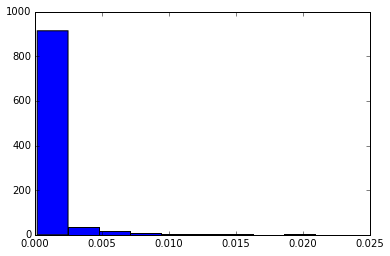

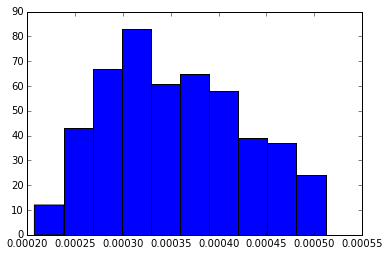

In [12]:
plt.hist(pr['prob'])
plt.figure()
plt.hist(pr.iloc[int(len(pr)/2.):len(pr)-1]['prob'])

In [13]:
page_rank_graph(g_desserts)

,ingredient,prob
24,sugar,0.059090
239,unsalted butter,0.054924
270,salt,0.047113
104,heavy cream,0.030391
172,all-purpose flour,0.026122
193,granulated sugar,0.026017
152,large eggs,0.023967
40,vanilla extract,0.020380
210,pure vanilla extract,0.017839
125,water,0.014540


In [47]:
id_map = {}
i = 0
for g in g_sampled.node.keys():
    if not id_map.has_key(g):
        id_map[g] = i
        i += 1

In [48]:
pd.DataFrame({'Label':g_sampled.node.keys(), 'Id': xrange(len(g_sampled.node))}, ).to_csv(
    'data/sampled_nodes.csv', index=False, encoding='utf-8'
)

In [54]:
edges = []
for e in g_sampled.edge:
    for e2 in g_sampled.edge[e]:
        for i in xrange(g_sampled.edge[e][e2]['weight']):
            edges.append(dict(
                source=id_map[e],
                target=id_map[e2],
                ))


In [55]:
pd.DataFrame(edges).to_csv(
    'data/sampled_edges.csv', index=False,encoding='utf-8'
)